=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None 

=== DESCRIBE ===
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000 

=== BRAKI DANYCH ===
total_bill    0
t

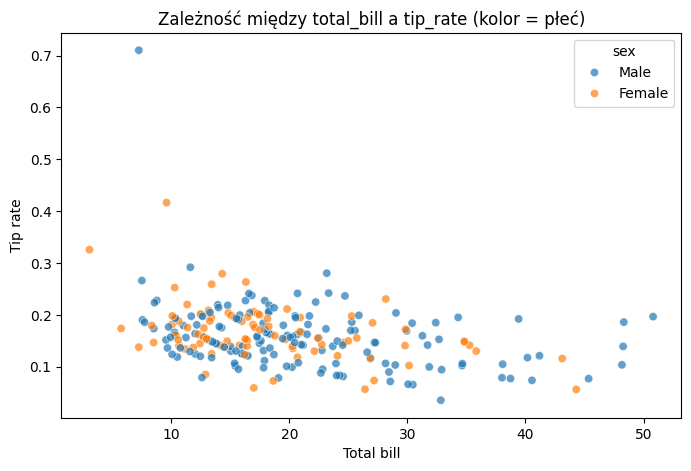

=== ŚREDNI TIP_RATE: WEEKEND vs WEEKDAYS ===
is_weekend
False    0.163302
True     0.159561
Name: tip_rate, dtype: float64 

=== ŚREDNI TIP_RATE WG PŁCI ===
sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64 



In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

df = sns.load_dataset("tips")

print("=== INFO ===")
print(df.info(), "\n")

print("=== DESCRIBE ===")
print(df.describe(), "\n")

print("=== BRAKI DANYCH ===")
print(df.isnull().sum(), "\n")

group_day_sex = df.groupby(["day", "sex"], observed=True).agg(
    mean_total_bill=("total_bill", "mean"),
    mean_tip=("tip", "mean")
).reset_index()

print("=== ŚREDNIE TOTAL_BILL I TIP WG DNIA I PŁCI ===")
print(group_day_sex, "\n")

df["tip_rate"] = df["tip"] / df["total_bill"]

group_tip_rate = df.groupby(["day", "time"], observed=True).agg(
    mean_tip_rate=("tip_rate", "mean")
).reset_index()

print("=== ŚREDNI TIP_RATE WG DNIA I PORY DNIA ===")
print(group_tip_rate, "\n")

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="total_bill",
    y="tip_rate",
    hue="sex",
    alpha=0.7
)
plt.title("Zależność między total_bill a tip_rate (kolor = płeć)")
plt.xlabel("Total bill")
plt.ylabel("Tip rate")
plt.show()

df["is_weekend"] = df["day"].isin(["Sat", "Sun"])

mean_tip_rate_weekend = df.groupby("is_weekend", observed=True)["tip_rate"].mean()
mean_tip_rate_gender = df.groupby("sex", observed=True)["tip_rate"].mean()

print("=== ŚREDNI TIP_RATE: WEEKEND vs WEEKDAYS ===")
print(mean_tip_rate_weekend, "\n")

print("=== ŚREDNI TIP_RATE WG PŁCI ===")
print(mean_tip_rate_gender, "\n")